In [114]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# 0) Utility Functions

In [115]:
def plot_histogram(data, column, bins=20, color='green', edgecolor='black'):
    """
    Plot histogram for a given column in the dataset.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column (str): The column name for which histogram needs to be plotted.
    bins (int, optional): Number of bins in the histogram. Default is 20.
    color (str, optional): Color of the bars in the histogram. Default is 'green'.
    edgecolor (str, optional): Color of the edges of the bars. Default is 'black'.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=bins, color=color, edgecolor=edgecolor)
    plt.title(f'Histogram: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [116]:
def plot_scatter(data, x_column, y_column, color='blue', alpha=0.5):
    """
    Plot scatter plot for two given columns in the dataset.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    color (str, optional): Color of the markers in the scatter plot. Default is 'blue'.
    alpha (float, optional): Transparency of the markers. Default is 0.5.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_column], data[y_column], color=color, alpha=alpha)
    plt.title(f'Scatter Plot: {x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

In [117]:
def plot_pie(data, column):
    """
    Plot a pie chart for a given column in the dataset.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column (str): The column name for which to plot the pie chart.
    """
    plt.figure(figsize=(8, 6))
    labels = data[column].value_counts().index
    sizes = data[column].value_counts().values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart: {column.capitalize()}')
    plt.axis('equal')
    plt.show()

In [118]:
def plot_elbow(X, max_clusters=10):
    """
    Plot the Elbow plot to determine the optimal number of clusters.

    Parameters:
    X (DataFrame): The DataFrame containing the features for clustering.
    max_clusters (int): The maximum number of clusters to consider. Default is 10.
    """
    wcss = []  # Within-cluster sum of squares

    # Calculate WCSS for different number of clusters (k)
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plotting the Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Plot: Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()


In [119]:
housing_data = pd.read_csv("Housing.csv")

In [120]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [121]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [122]:
# Check for duplicates
housing_data.drop_duplicates(inplace=True)

In [123]:
object_columns = housing_data.select_dtypes(include=['object']).columns
housing_data[object_columns] = housing_data[object_columns].astype('category')


In [124]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [125]:
# Replace spaces in column names
housing_data.columns = housing_data.columns.str.replace(' ', '')


In [126]:
# # Convert specific columns to categorical data type
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing_data[columns_to_convert] = housing_data[columns_to_convert].astype('category')


# Visual Analysis

### Clustering and Filtering

In [127]:
# Selecting numerical features for clustering and fitting
numerical_features = housing_data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]


# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
housing_data['cluster_label'] = cluster_labels

# Check the distribution of data points across clusters
print(housing_data['cluster_label'].value_counts())

cluster_label
1    282
2    199
0     64
Name: count, dtype: int64


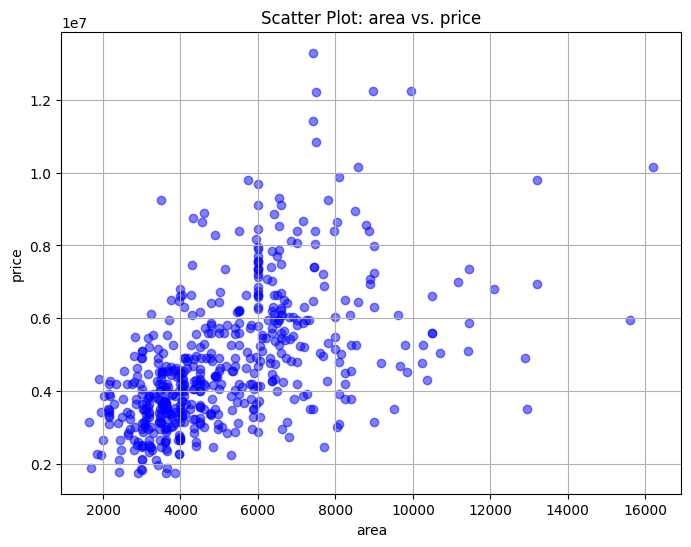

In [128]:
plot_scatter(housing_data, 'area', 'price')

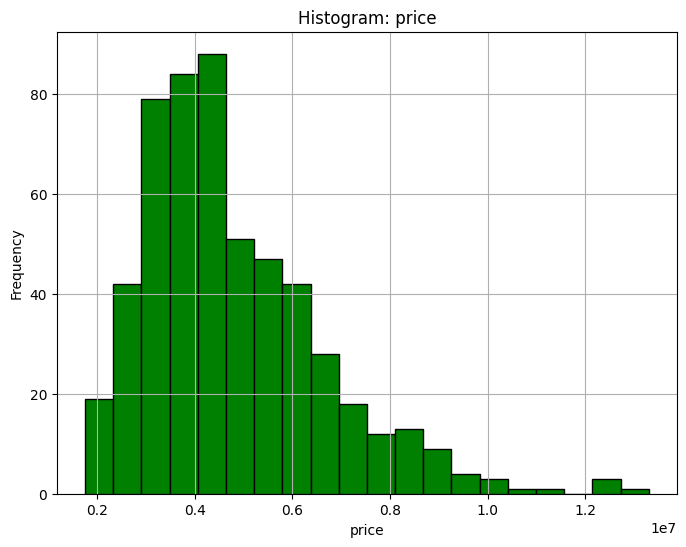

In [129]:
plot_histogram(housing_data, 'price')

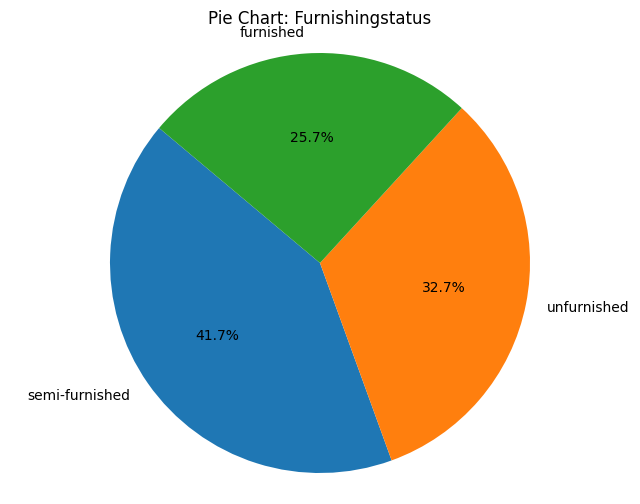

In [130]:
# Pie chart: Furnishing Status
plot_pie(housing_data, 'furnishingstatus')

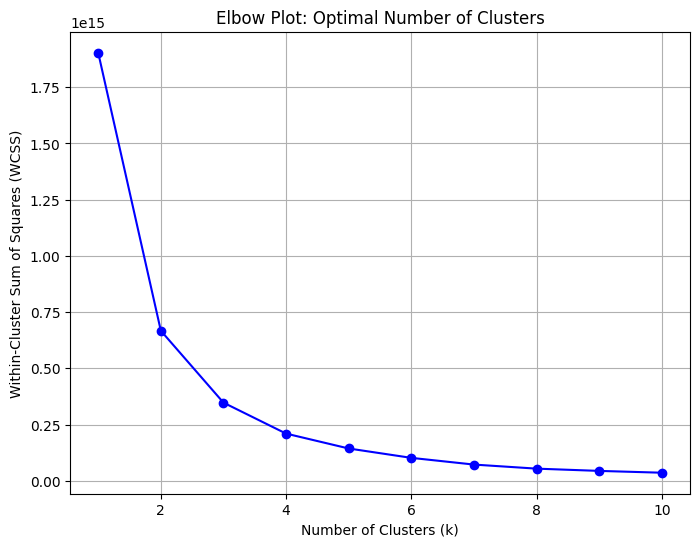

In [131]:
# # Elbow Plot: Determine the optimal number of clusters
X = housing_data[['area', 'price']]  # Using area and price for clustering
plot_elbow(X)

# Model Implmentation

## K Means

In [132]:
def preprocess_data(data):
    # One-hot encode binary categorical variables
    binary_categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
    data = pd.get_dummies(data, columns=binary_categorical_cols, drop_first=True)

    # Encode multi-category categorical variable
    label_encoder_multi = LabelEncoder()
    data['furnishingstatus'] = label_encoder_multi.fit_transform(data['furnishingstatus'])

    # Handling missing values for numerical columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    return data

# Preprocessing data
kmeans_encoded_housing_data = preprocess_data(housing_data)


In [133]:
# Features and target variable
X = kmeans_encoded_housing_data.drop('price', axis=1)
y = kmeans_encoded_housing_data['price']

In [140]:
def perform_kmeans(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    return labels

# Clustering
num_clusters = 3

# Perform one-hot encoding
X_encoded = pd.get_dummies(X)

# Perform KMeans clustering and compute silhouette score
labels = perform_kmeans(X_encoded, num_clusters=num_clusters)
km_silhouette_score_val = silhouette_score(X_encoded, labels)
print(f"Silhouette Score for KMeans clustering: {km_silhouette_score_val}")

# Define features and labels
features = X_encoded
labels = y

# Perform cross-validation
km_cv_scores = cross_val_score(KMeans(n_clusters=num_clusters, init='k-means++', random_state=42), features, labels, cv=5)
print("Cross-Validation Scores:",km_cv_scores)
print("Mean Cross-Validation Score:", km_cv_scores.mean())

Silhouette Score for KMeans clustering: 0.626097089778701
Cross-Validation Scores: [-1.58435279e+08 -1.25361711e+08 -7.77807713e+07 -7.57324874e+07
 -8.44608321e+07]
Mean Cross-Validation Score: -104354216.23522791


In [135]:
def preprocess_data(data):
    # One-hot encode binary categorical variables
    binary_categorical_cols = ['guestroom', 'basement','prefarea','mainroad','hotwaterheating','airconditioning']
    data = pd.get_dummies(data, columns=binary_categorical_cols, drop_first=True)

    # Handling missing values for numerical columns (if any)
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    return data


# Preprocessing data
encoded_linear_housing_data = preprocess_data(housing_data)

In [136]:
print(encoded_linear_housing_data.dtypes)


price                     int64
area                      int64
bedrooms                  int64
bathrooms                 int64
stories                   int64
parking                   int64
furnishingstatus       category
cluster_label             int32
guestroom_yes              bool
basement_yes               bool
prefarea_yes               bool
mainroad_yes               bool
hotwaterheating_yes        bool
airconditioning_yes        bool
dtype: object


In [137]:
print(encoded_linear_housing_data['furnishingstatus'].value_counts())



furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [143]:
# Perform one-hot encoding for the remaining categorical variables
one_hot_encoded_linear_housing_data = pd.get_dummies(encoded_linear_housing_data, columns=['furnishingstatus'], dtype='category')

# Split the data into features (X) and target variable (y)
X = one_hot_encoded_linear_housing_data.drop('price', axis=1)
y = one_hot_encoded_linear_housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'prefarea_yes',
                     'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

# Selecting features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Polynomial Features
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Regularization (Ridge Regression)
alpha = 0.1
ridge_model = Ridge(alpha=alpha)

# Training the model
ridge_model.fit(X_train_poly, y_train)

# Cross-Validation
linear_cv_scores = cross_val_score(ridge_model, X_train_poly, y_train, cv=5)
print("Cross-Validation Scores:",linear_cv_scores)
print("Mean Cross-Validation Score:", np.mean(linear_cv_scores))

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test_poly)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Ridge Regression: {linear_mse}")

Cross-Validation Scores: [0.58731641 0.68584516 0.34317452 0.5621614  0.60365862]
Mean Cross-Validation Score: 0.5564312204067786
Mean Squared Error for Ridge Regression: 2190164507208.7751
